In [14]:
# !pip3 install pandas

In [15]:
# !pip3 install matplotlib

In [16]:
import os # creating directories
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# load tweet corpus data
df = pd.read_csv("../datain/topic_modelling/cleaned_tweets_largest_community2.csv")
df = df.drop("Unnamed: 0", axis=1)
df

,created_at,id,cleaned_tweet
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project reset
2,2021-05-31 23:59:35+00:00,1399515936093204480,beautiful project congratulations whole team h...
3,2021-05-31 23:58:47+00:00,1399515734007447552,participating cryptoultraman airdrop round
4,2021-05-31 23:58:44+00:00,1399515723274280960,nice find project project great invite many pe...
...,...,...,...
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena
407486,2021-02-01 10:49:53+00:00,1356193045817872384,great project
407487,2021-02-01 09:29:19+00:00,1356172769424244736,rates determined higher chance worse low chanc...


In [18]:
# remove any null created_at values from dataframe
df = df.drop(df[df['created_at'].isnull()].index)
# ensure that all values in created_at has 2021 (and not random strings)
df = df[df['created_at'].str.contains("2021")]

# split created_at into date and time columns
#https://intellipaat.com/community/13909/python-how-can-i-split-a-column-with-both-date-and-time-e-g-2019-07-02-00-12-32-utc-into-two-separate-columns
df['created_at'] = pd.to_datetime(df['created_at'])
df['date'] = df['created_at'].dt.date
df['time'] = df['created_at'].dt.time

df

,created_at,id,cleaned_tweet,date,time
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project,2021-05-31,23:59:42
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project reset,2021-05-31,23:59:40
2,2021-05-31 23:59:35+00:00,1399515936093204480,beautiful project congratulations whole team h...,2021-05-31,23:59:35
3,2021-05-31 23:58:47+00:00,1399515734007447552,participating cryptoultraman airdrop round,2021-05-31,23:58:47
4,2021-05-31 23:58:44+00:00,1399515723274280960,nice find project project great invite many pe...,2021-05-31,23:58:44
...,...,...,...,...,...
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great,2021-02-01,11:31:45
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena,2021-02-01,11:05:55
407486,2021-02-01 10:49:53+00:00,1356193045817872384,great project,2021-02-01,10:49:53
407487,2021-02-01 09:29:19+00:00,1356172769424244736,rates determined higher chance worse low chanc...,2021-02-01,09:29:19


In [19]:
# group tweets by date and count number of entries per day
dates = df.groupby('date').count()
dates

,created_at,id,cleaned_tweet,time
date,,,,
2021-02-01,8,8,8,8
2021-02-02,9,9,9,9
2021-02-03,13,13,13,13
2021-02-04,3,3,3,3
2021-02-05,7,7,7,7
...,...,...,...,...
2021-05-27,6417,6417,6404,6417
2021-05-28,9037,9037,9028,9037
2021-05-29,7751,7751,7737,7751


# Plot

In [23]:
# plt.plot(dates.index, dates['corpus'])
# plt.title('Tweet Frequency over time: 1 Feb - 31 May')
# plt.xlabel('Date')
# plt.ylabel('Number of Tweets')
# plt.savefig('../dataout/general/Total_tweet_frequency.jpeg')
# plt.close()

In [24]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.plot(dates.index, 'cleaned_tweet', data=dates)

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_half_year)
plt.title('Tweet Frequency over time: 1 Feb - 31 May')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.savefig('../dataout/general/Total_tweet_frequency2.jpeg')
plt.close()

## Hacky wayzz

In [ ]:
dates['day'] = ''
for i in range(0, len(dates.index)):
    dates['day'][i] = dates.index[i].day

In [59]:
# hacky group dates by month
dates2 = dates[89:120]
dates2

,created_at,corpus,cleaned_tweet,time,day
date,,,,,
2021-05-01,17097,17097,17097,17097,1
2021-05-02,6076,6076,6076,6076,2
2021-05-03,9330,9330,9330,9330,3
2021-05-04,8247,8247,8247,8247,4
2021-05-05,25580,25580,25579,25580,5
2021-05-06,9330,9330,9330,9330,6
2021-05-07,12588,12588,12587,12588,7
2021-05-08,5223,5223,5222,5223,8
2021-05-09,2775,2775,2775,2775,9


Text(0.5, 1.0, 'May: Tweet Frequency over time')

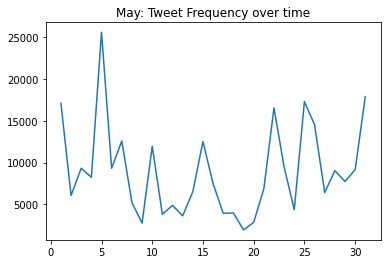

In [60]:
plt.plot(dates2['day'], dates2['corpus'])
plt.title('May: Tweet Frequency over time')

In [32]:

#plot tweet frequency over time
plt.plot(dates['day'], dates['cleaned_tweet'])
plt.title('Tweet Frequency over time')
plt.xlabel('Day in month 2021')
plt.ylabel('Number of Tweets')
plt.savefig('../dataout/general/Total_tweet_frequency.jpeg')
plt.close()

In [7]:
run()